In [1]:
#__depends__ = ["/Volumes/Seagate Expansion Drive/seq1_jcole_gene-editing_gene-editing_multiple/multiple"]
#__dest__ = ["./results"]

In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.mpl_style = 'default'
import statsmodels.api as sm
import itertools
import numpy as np
import seaborn as sns

/home/jcole/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2869: FutureWarning: 
mpl_style had been deprecated and will be removed in a future version.
Use `matplotlib.pyplot.style.use` instead.

  exec(code_obj, self.user_global_ns, self.user_ns)
/home/jcole/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [4]:
plt.rcdefaults()
# Typeface sizes
from matplotlib import rcParams
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 12
#rcParams['font.family'] = 'serif'
#rcParams['font.serif'] = ['Computer Modern Roman']
#rcParams['text.usetex'] = True

# Optimal figure size
WIDTH = 350.0  # the number latex spits out
FACTOR = 0.90  # the fraction of the width you'd like the figure to occupy
fig_width_pt  = WIDTH * FACTOR

inches_per_pt = 1.0 / 72.27
golden_ratio  = (np.sqrt(5) - 1.0) / 2.0  # because it looks good

fig_width_in  = fig_width_pt * inches_per_pt  # figure width in inches
fig_height_in = fig_width_in * golden_ratio   # figure height in inches
fig_dims      = [fig_width_in, fig_height_in] # fig dims as a list

rcParams['figure.figsize'] = fig_dims

First, let's load the results from the small model of polled included in the default settings. This involves loading four animal files (live cows, dead cows, live bulls, and dead bulls). We will load them and merge them into a single data frame.

In [17]:
pop_edited = '10_01'
methods = ['crispr', 'noedits', 'perfect', 'talen', 'zfn']
for method in methods:
    print method
    # We have 10 replicates for each simulation
    for sim in xrange(1,11):
        if sim == 1: print '\tReplicate: ', sim,
        elif sim < 10: print ', ', sim,
        else: print ', ', sim, ''
        # Load the individual history files
        lc = pd.read_csv('multiple/10_01/%s/%s/cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        dc = pd.read_csv('multiple/10_01/%s/%s/dead_cows_history_%s_20.txt'%(method,sim,method), sep='\t')
        lb = pd.read_csv('multiple/10_01/%s/%s/bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        db = pd.read_csv('multiple/10_01/%s/%s/dead_bulls_history_%s_20.txt'%(method,sim,method), sep='\t')
        # Stack the individual animal datasets
        all_animals = pd.concat([lc, dc, lb, db], axis=0)
        all_animals['replicate'] = sim
        all_animals['method'] = method
    if method == methods[0]:
        grouped = pd.crosstab(all_animals['died'], all_animals['cause']).apply(lambda r: r/r.sum(), axis=1)
        grouped['method'] = method
    else:
        temp_grouped = pd.crosstab(all_animals['died'], all_animals['cause']).apply(lambda r: r/r.sum(), axis=1)
        temp_grouped['method'] = method
        grouped = pd.concat([grouped, temp_grouped])

crispr
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
noedits
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
perfect
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
talen
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 
zfn
	Replicate:  1 ,  2 ,  3 ,  4 ,  5 ,  6 ,  7 ,  8 ,  9 ,  10 


Modified Pryce's Algorithm
====
Causes of death (A=culled for age, N=culled for population size, R=died from recessive)

In [18]:
grouped.head()

,A,G,N,R,method
died,,,,,
1,0.000000,0.086894,0.913106,NaN,crispr
2,0.211130,0.067447,0.721423,NaN,crispr
3,0.163845,0.071442,0.764713,NaN,crispr
4,0.071979,0.044259,0.883762,NaN,crispr
5,0.049247,0.043982,0.906771,NaN,crispr


In [22]:
grouped.tail()

,died,A,G,N,R,method
95,16,0.057552,0.050767,0.891680,NaN,zfn
96,17,0.057442,0.051037,0.891521,NaN,zfn
97,18,0.056070,0.050801,0.893128,NaN,zfn
98,19,0.056336,0.050862,0.892802,NaN,zfn
99,20,0.055711,0.050623,0.893666,NaN,zfn


In [19]:
grouped = grouped.reset_index()

In [20]:
grouped.columns

Index([u'died', u'A', u'G', u'N', u'R', u'method'], dtype='object')

In [23]:
grouped['R'].fillna(0.0, inplace=True)

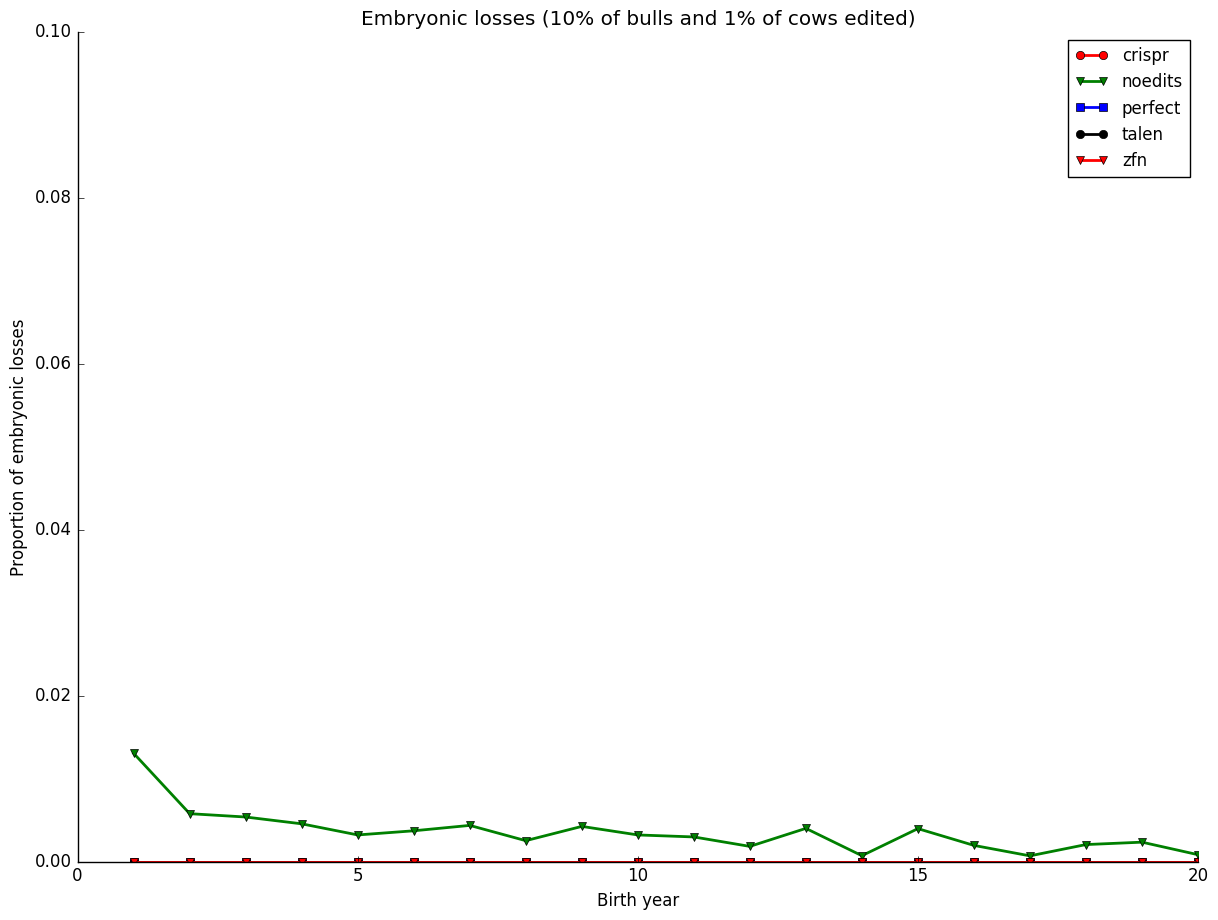

In [24]:
fig = plt.figure(figsize=(12, 9), dpi=300, facecolor='white')

# Set nicer limits
ymin ,ymax = 0, 0.10
xmin, xmax = 0, 31

colors = itertools.cycle(['r', 'g', 'b','k'])
markers = itertools.cycle(['o', 'v', 's'])

ax = fig.add_subplot(1, 1, 1)
ax.set_title('Embryonic losses (10% of bulls and 1% of cows edited)')
ax.set_xlabel('Birth year')
ax.set_ylabel('Proportion of embryonic losses')
ax.plot(grouped['died'][grouped['method']=='crispr'], grouped['R'][grouped['method']=='crispr'], label='crispr', linewidth=2, marker=markers.next(), c=colors.next())
ax.plot(grouped['died'][grouped['method']=='noedits'], grouped['R'][grouped['method']=='noedits'], label='noedits', linewidth=2, marker=markers.next(), c=colors.next())
ax.plot(grouped['died'][grouped['method']=='perfect'], grouped['R'][grouped['method']=='perfect'], label='perfect', linewidth=2, marker=markers.next(), c=colors.next())
ax.plot(grouped['died'][grouped['method']=='talen'], grouped['R'][grouped['method']=='talen'], label='talen', linewidth=2, marker=markers.next(), c=colors.next())
ax.plot(grouped['died'][grouped['method']=='zfn'], grouped['R'][grouped['method']=='zfn'], label='zfn', linewidth=2, marker=markers.next(), c=colors.next())
ax.legend(loc='best')

ax.set_ylim(ymin, ymax)

# Despine
ax = fig.gca()
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Plot and save
fig.tight_layout(pad=0.1)  # Make the figure use all available whitespace
fig.savefig('multiple/10_01/embryonic losses_10_01.png', dpi=300)
plt.show()

In [49]:
margins

,ran,toppct,pryce,pryce_r
died,,,,
1,0.006688,0.009867,0.011054,0.011179
2,0.005479,0.007630,0.007873,0.008147
3,0.005554,0.008089,0.017121,0.013519
4,0.003286,0.005152,0.013047,0.013193
5,0.003229,0.004898,0.012750,0.013470
6,0.002891,0.004765,0.013840,0.013652
7,0.003002,0.005635,0.012491,0.013074
8,0.002809,0.004478,0.013782,0.009716
9,0.002675,0.004963,0.010020,0.008837
